In [ ]:
# install vanderSentiment package for VADER
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000) #pengaturan display

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
import os
os.chdir("./drive/My Drive/NLP2023/")

In [ ]:
# Print out the current directory
!pwd

/content/drive/My Drive/NLP2023


In [ ]:
# Read in data
amz_review = pd.read_csv('imdb_labelled.txt', sep='\t', names=['review', 'label'])

In [ ]:
# Take a look at the data
amz_review.head(10)

,review,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0
6,Wasted two hours.,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the science teacher.,1


In [ ]:
# Get the dataset information
amz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  748 non-null    object
 1   label   748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
# Check the label distribution
amz_review['label'].value_counts()

1    386
0    362
Name: label, dtype: int64

In [ ]:
# Example text
text = 'GrabNGoInfo.com is a great machine learning tutorial website.'

# VADER Sentiment
vader = SentimentIntensityAnalyzer()
vader_sentiment = vader.polarity_scores(text)
vader_sentiment

{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

In [ ]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

In [ ]:
# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head(10)

,review,label,scores_VADER,pred_VADER
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,-0.4215,0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,-0.5507,0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.7178,0
3,Very little music or anything to speak of.,0,0.0000,1
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,0.6369,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0,-0.2500,0
6,Wasted two hours.,0,-0.4939,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1,0.7003,1
8,A bit predictable.,0,0.0000,1
9,Loved the casting of Jimmy Buffet as the science teacher.,1,0.5994,1


In [ ]:
# Compare Actual and Predicted
accuracy_score(amz_review['label'],amz_review['pred_VADER'])

0.7767379679144385

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
compound_scores = [0.1, 0.2, -0.3, 0.5, -0.2, 0.8, -0.5, -0.1, 0.4, -0.7]


(array([1., 1., 1., 2., 0., 1., 1., 1., 1., 1.]),
 array([-0.7 , -0.55, -0.4 , -0.25, -0.1 ,  0.05,  0.2 ,  0.35,  0.5 ,
         0.65,  0.8 ]),
 <BarContainer object of 10 artists>)

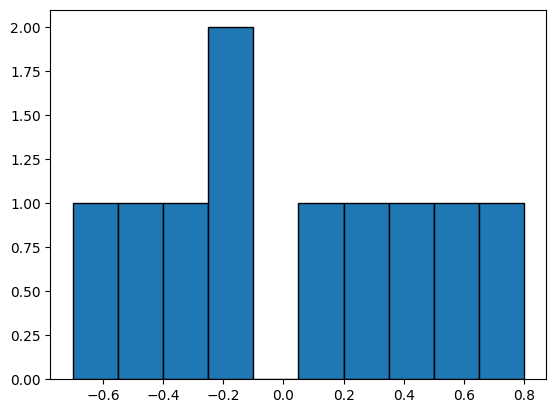

In [ ]:
plt.hist(compound_scores, bins=10, edgecolor='black')


Text(0, 0.5, 'N')

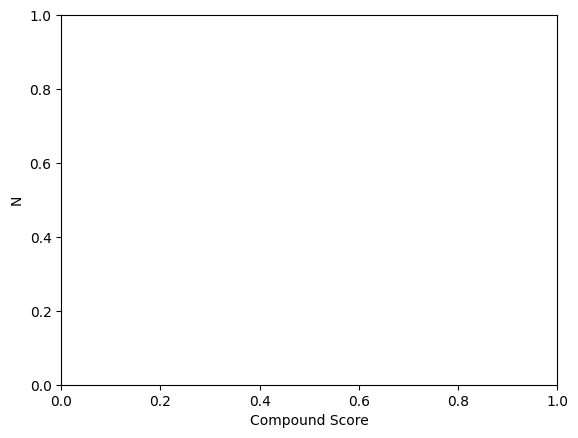

In [ ]:
# Atur label sumbu-x dan sumbu-y
plt.xlabel('Compound Score')
plt.ylabel('N')


In [ ]:
# Tampilkan plot
plt.show()